Exercise 2: Advanced Gradient Descent
-------------------------------------

Before we start modifying our gradient descent algorithm, let us first
put it in a more "useful" form.  Remember from the lecture on higher-order
functions that we can pass any function `f` as parameter into another
function and then just call the passed function.

Copy your function `gradient_descent()` from the previous lecture and
modify it such that it takes an additional parameter: `grad` (which is
a function returning the gradient).

You can remove any `print()` statements from the function 
(we will do this in a better way soon).

In [1]:
def gradient_descent(grad, x0, eta, max_iter):
    
    x=x0
    k=0
    
    while k<max_iter:
        x-=eta*grad(x)
        k+=1
        
    return x

Now we have a truly useful gradient descent function, which works for
any 1D function we throw at it.

In [2]:
def mexican_hat(x):
    return x**4 - 2 * x**2
    
def mexican_hat_grad(x):
    return 4 * (x**3 - x)

xmin = gradient_descent(mexican_hat_grad, -1.5, 0.1, 20)

In [3]:
print("f(", xmin, ") =", mexican_hat(xmin))

f( -0.9999999999999303 ) = -1.0


Try this out!  Make up some potential with a minimum, define its derivative,
see if your `gradient_descent` function can handle it.

Lists and plotting
---------------------

Let's understand graphically how the `mexican_hat` function looks.  To
do this, let us first create two lists, either by appending elements in a loop or
by list comprehension:

  - a list `x` with values from `[-1.5, -1.4, ..., 1.5]`
  - a list `y` with the associated values of `mexican_hat` for each of the `x`

In [4]:
import numpy as np

x = np.arange(-1.5, 1.6, 0.1).tolist()

#for i in range(-1.5,1.5,0.1):
#    x.append(i)

y=[]
for xi in x:
    y.append(mexican_hat(xi))

In [5]:
assert len(x) == len(y), "Arrays x and y should be of the same length"
assert abs(x[0] + 1.5) < 1e-10, "First value of x should be -1.5"
assert abs(x[-1] - 1.5) < 1e-10, "Last value of x should be 1.5"
assert abs(y[0] - mexican_hat(-1.5)) < 1e-5, "y values do not match x"
assert abs(y[-1] - mexican_hat(1.5)) < 1e-5, "y values do not match x"


Let's plot this now: plot the values `y` over `x` using matplotlib. Don't forget to import the library.

Remember for this and all subsequent plots: 
 - include a title
 - include axis labels
 - if you plot more than one function in a single figure, use labels and a legend

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-c__qi2j6 because the default path (/home/e01026902/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


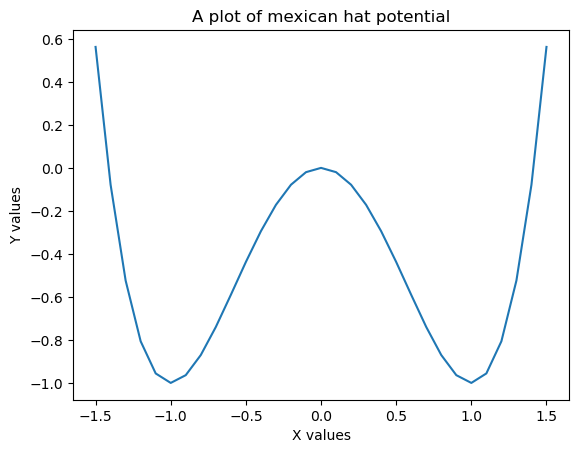

In [6]:
import matplotlib.pyplot as plt
plt.plot(x, y)
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('A plot of mexican hat potential')

plt.show()

Now we would like to understand how gradient descent converges to one of the minima shown above.

For this, copy the function from above and give it the new name `gradient_descent_all`.
Modify the function from its original as follows: instead of only the `x` value for the last
iteration it should give a list of values corresponding to `x` in each iteration.

In [7]:
def gradient_descent_all(grad, x0, eta, max_iter):
    
    x=[x0]
    k=0
    
    while k<max_iter:
        x0-=eta*grad(x0)
        x.append(x0)
        k+=1
        
    return x

In [ ]:
gradient_descent_all(mexican_hat_grad, 1.5, 0.1, 20)

In [8]:
assert iter(gradient_descent_all(mexican_hat_grad, 1.5, 0.1, 20)), "should give list"
assert abs(gradient_descent_all(mexican_hat_grad, 1.77, 0.1, 20)[0] - 1.77) < 1e-5, "initial value missing"
assert abs(gradient_descent_all(mexican_hat_grad, 1.5, 0.1, 20)[-1] - 1) < 1e-5, "last value should converge"


Now you can plot this list over the iteration number `t` to see how it converges.
Make two figures, each figure with three or so plot lines: one where you vary `eta` and keep the
initial position constant and one where you vary the initial position but keep
`eta` constant

(Hint: look into the documentation of plot to make your life easier)

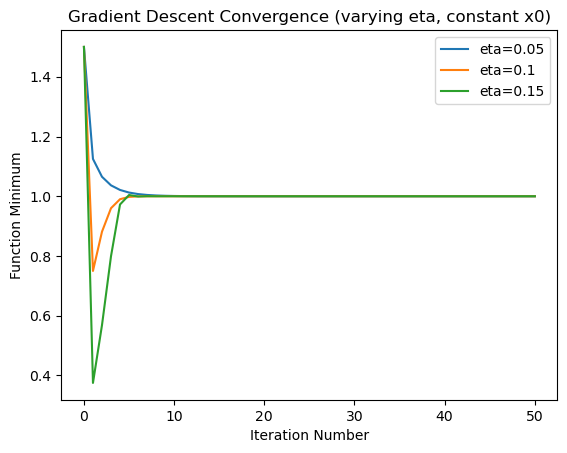

In [9]:
import matplotlib.pyplot as plt

# Define range of eta values to test
etas = [0.05, 0.1, 0.15]

# Plot convergence for each eta value
for eta in etas:
    x_vals = gradient_descent_all(mexican_hat_grad, 1.5, eta, 50)
    plt.plot(range(len(x_vals)), x_vals, label=f'eta={eta}')
    
# Add axis labels and title
plt.xlabel('Iteration Number')
plt.ylabel('Function Minimum')
plt.title('Gradient Descent Convergence (varying eta, constant x0)')

# Add legend
plt.legend()

# Show plot
plt.show()

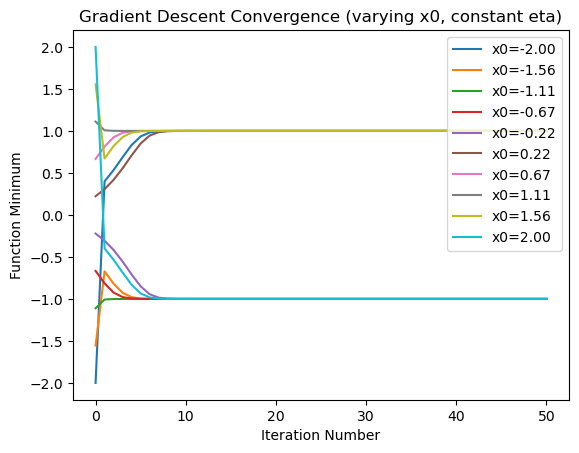

In [10]:
# Define range of x0 values to test
x0s = np.linspace(-2, 2, 10)

# Plot convergence for each x0 value
for x0 in x0s:
    x_vals = gradient_descent_all(mexican_hat_grad, x0, 0.1, 50)
    plt.plot(range(len(x_vals)), x_vals, label=f'x0={x0:.2f}')
    
# Add axis labels and title
plt.xlabel('Iteration Number')
plt.ylabel('Function Minimum')
plt.title('Gradient Descent Convergence (varying x0, constant eta)')

# Add legend
plt.legend()

# Show plot
plt.show()

Nesterov-accelerated Gradient Descent
-----------------------------------------------
Finally, let's explore the effect of momentum on gradient descent.

Copy your function `gradient_descent_all`, and give it a new name
`nesterov_all`.  Modify the function to implement the Nesterov acceleration scheme.  You
now need the additional mixing parameter `gamma`.

In [11]:
def nesterov_all(grad, x0, eta, gamma, max_iter):
    x=[x0]
    v=0
    k=0
    
    while k<max_iter:
        v=v*gamma-eta*grad(x0)
        x0+=v
        x.append(x0)
        k+=1
        
    return x

In [12]:
nesterov_all(mexican_hat_grad, 2.0, 0.1, 0.1, 20)

[2.0,
 -0.40000000000000036,
 -0.7744000000000004,
 -0.9358383652864003,
 -0.9984771052180678,
 -1.0059565133993242,
 -1.001896582900777,
 -0.9999690043694375,
 -0.9998010418678905,
 -0.9999433646253677,
 -1.000002901351815,
 -1.0000065339329063,
 -1.0000016699934595,
 -0.9999998476014006,
 -0.9999997872810463,
 -0.9999999514241196,
 -1.0000000066991284,
 -1.0000000068673265,
 -1.000000001390285,
 -0.9999999997303528,
 -0.9999999997800774]

In [13]:
# Sanity checks
assert iter(nesterov_all(mexican_hat_grad, 1.5, 0.1, 0.1, 20)), "should give list"
assert abs(nesterov_all(mexican_hat_grad, 1.77, 0.1, 0.1, 20)[0] - 1.77) < 1e-5, "initial value missing"
assert abs(nesterov_all(mexican_hat_grad, 1.5, 0.1, 0.1, 20)[-1] - 1) < 1e-5, "last value should converge"



Let's compare how Nesterov and regular GD converge: Make a figure with two plots: one where you plot the steps for regular gradient descent and one where you plot the steps for Nesterov acceleration for the `mexican_hat` function and the same starting point.

Play around a little bit

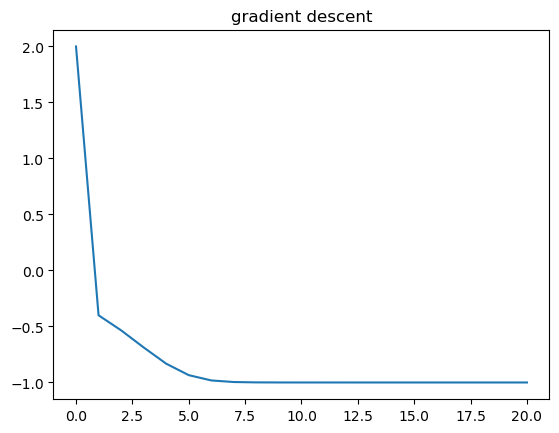

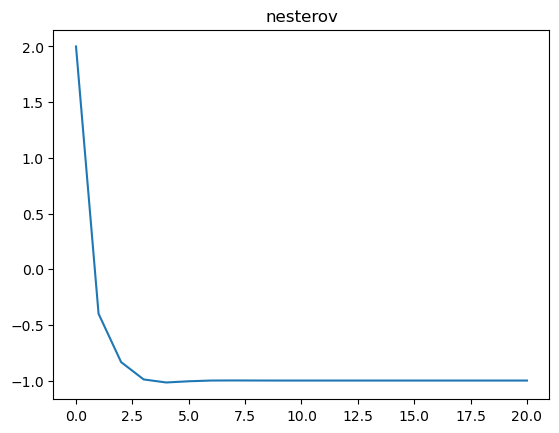

In [14]:
x=gradient_descent_all(mexican_hat_grad, 2.0, 0.1, 20)

plt.plot(x)

plt.title('gradient descent')

plt.show()
x=nesterov_all(mexican_hat_grad, 2.0, 0.1, 0.125, 20)
plt.plot(x)
plt.title('nesterov')

plt.show()

Describe in words how the behaviour changes when momentum is included.

What happens when you vary `eta`? What happens when you vary `gamma`?

both change the speed which the minimum is reached.

Back-propagation
--------------------------
For a super-advanced final touch, let us briefly touch on back-propagation: for this, remember that it allows to compute the derivative of some composition of functions:
$$
        E(x) = f(g(x))
$$
by using the chain rule.

Let's try this out: write a function that takes as arguments four other functions, representing $f$, $g$ and the derivatives $f'$ and $g'$ and **return a new function** which computes $E'(x)$

In [15]:
def get_back_prop(f, g, gradf, gradg):
    def gradfg(x):
        return gradf(g(x))*gradg(x)
        
    # This returns the function we have constructed above.  In other words,
    # get_back_prop is a function that combines functions to a new function.
    # (Cue horn sounds from the movie Inception.)
    return gradfg

Let's try out your function:

I have assumed that $E(x) =$ `mexican_hat(linear_trafo(x))`, in other words,
$f(x) =$ `mexican_hat(x)` and $g(x) =$ `linear_trafo(x)`.  This is common in
Machine Learning, where a linear and a non-linear part alternates.  Let's see
if we can apply back-propagation.

In [16]:
def linear_trafo(x):
    return 2 * x + 1

def linear_trafo_grad(x):
    return 2

def E(x):
    return mexican_hat(linear_trafo(x))

In [17]:
dEdx = get_back_prop(mexican_hat, linear_trafo, mexican_hat_grad, linear_trafo_grad)

In [18]:
assert abs(dEdx(0)) < 1e-5, "dEdx(0) should be zero"
assert abs(dEdx(-1)) < 1e-5, "dEdx(-1) should be zero"

assert abs(dEdx(0.5) - 48) < 1e-5, "dEdx(0.5) should be 48 (really? yes!)"
